# Introduction to Data in AI
We establish that data is the essential fuel for most modern AI systems, particularly for "Perception AI".

Perception AI is defined as a system based on statistical learning, where an agent perceives environmental data, finds patterns within it, and uses those patterns to make decisions or draw conclusions.

The text distinguishes Perception AI from three other types: Understanding AI (comprehending the function and implications of classified data), Control AI (managing the physical actions of an AI agent), and Awareness AI (possessing a subjective, human-like consciousness).

Our primary focus will be on Perception AI, while acknowledging that true human-like intelligence would likely integrate all four aspects.

**Key Points**

* Data is the fundamental component that powers the majority of AI
systems.
* Perception AI operates by using statistical learning to identify patterns in data, which informs its conclusions and decisions.
* The three other types of AI are:
 * Understanding AI: Goes beyond classification to grasp the meaning and context of information.
 * Control AI: Pertains to the physical manipulation and navigation of an environment, as seen in robotics.
 * Awareness AI: A theoretical type of AI with an inner experience akin to human consciousness, which is not yet mathematically definable.
* Our focus is on Perception AI.



---



**Data for AI: Core Problems and Challenges**

This section frames the central problem in many machine learning models as an issue of function fitting: developing a function that can map inputs to outputs by capturing the important signals in a dataset while disregarding noise. Crucially, this function must also perform well on new, previously unseen data. The text outlines four major challenges in this process: Hypothesis and features, where the true data-generating function is unknown; Performance, which is difficult to measure on real-world data that lacks ground-truth labels; Volume, as AI systems must handle high-dimensional data that presents significant storage and computational hurdles ; and Structure, since most modern data is unstructured (e.g., images, text) and harder to analyze than neatly organized tables.

**Key Points**

* The core task in much of AI is to fit a function to a set of data points that can generalize to new data.

* A key strength of AI is its ability to detect subtle and complex nonlinear interactions between data features that humans often miss.

* The four main challenges are:

 1. Hypothesis and features: The true function that generated the data is unknown, so one must be estimated.

 2. Performance: Evaluating a model's effectiveness on new, unlabeled real-world data is a significant challenge.

 3. Volume: The high dimensionality of AI-related data demands efficient methods for storage, transport, and computation.

 4. Structure: The majority of data created today is unstructured (e.g., social media posts, images, documents), which requires innovative mining techniques.
 ---

**Real Data Versus Simulated Data**

This section draws a distinction between real and simulated data. Real data is gathered from real-world observations through methods like surveys, sensors, and experiments. It is characterized by being imperfect, noisy, and generated by an unknown underlying function or probability distribution. In contrast, simulated data is algorithmically generated from a mathematical function or probability distribution that is known and defined beforehand. Simulation is extremely valuable when real data is expensive, rare, or dangerous to collect, as it allows for the testing of various scenarios in a controlled way.

**Key Points**

* Real Data: Collected via real-world measurement, it is often imperfect and noisy, and its true generating function is unknown.
* Simulated Data: Generated programmatically from a known mathematical model. It is a powerful tool for testing hypotheses and creating data when real-world collection is not feasible.

---

**Mathematical Models: Linear Versus Nonlinear**

This section explains the foundational difference between linear and nonlinear models. Linear models are used to represent "flat" relationships in the world, such as straight lines or flat surfaces. The mathematical formula for a linear function involves features that are simply multiplied by constant weights and added together. Nonlinear models describe any relationship that is not flat; their graphs can bend and curve. The formulas for nonlinear functions are more complex and can include features raised to powers, divided by other features, or embedded within other functions like sine, cosine, or exponential functions. The text notes that the success of modern neural networks stems from their powerful ability to model complex, nonlinear interactions within data.

**Key Points**

* Linear models correspond to flat geometrical objects like lines and planes.
* Nonlinear models correspond to anything with curvature.
* In a linear function, the output is a simple weighted sum of the input features (plus a bias term).
* In a nonlinear function, features can interact in complex ways, such as being squared, divided, or transformed by other mathematical functions.
* Neural networks are powerful because they can effectively learn nonlinear relationships in data.



General Linear Function of three variables ($x_1$, $x_2$, $x_3$) with weights ($\omega_i$):
$$ f(x_1, x_2, x_3) = \omega_0 + \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3 $$

Examples of Nonlinear Functions:
$$ f(x_1, x_2, x_3) = \omega_0 + \omega_1 \sqrt{x_1} + \omega_2 \frac{x_3}{x_2} $$
$$ f(x_1, x_2, x_3) = \omega_0 + \omega_1 x_1^2 + \omega_2 x_2^2 + \omega_3 x_3^2 $$
$$ f(x_1, x_2, x_3) = \omega_1 e^{x_1} + \omega_2 e^{x_2} + \omega_3 \cos(x_3) $$

**An Example of Real Data**

This section illustrates the process of real-world data exploration. Using two datasets of human height and weight from the Kaggle website, the author attempts to find a function that models a person's weight based on their height. The initial plot of the first dataset reveals no obvious pattern between height and weight. However, after further investigation, the author discovers that by splitting the data based on a health "Index score" (related to obesity), a clear linear relationship becomes visible for each subgroup. The second dataset, in contrast, shows a clear linear trend from the start. This example underscores that working with real data is an iterative process of investigation, hypothesis testing, and refinement.

**Key Points**

* The stated goal is to find a function to predict weight from height: weight = f(height).
* Initial exploration of a real dataset may not reveal any patterns.
* The absence of a pattern can sometimes be resolved by conditioning on or segmenting by another variable. In this case, splitting the data by "Index score" revealed an underlying linear relationship.
* This process highlights the hands-on, investigative nature of data analysis.


After observing a pattern, a linear model is hypothesized:


$$ \text{weight} = \omega_0 + \omega_1 \times \text{height} $$


Python Example: Exploring "Real" Data
The following code simulates the experience described in the text. We will generate two datasets: one where the relationship is obscured by a confounding variable and one where it is clear.

In [1]:
# Text Cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Dataset 1: Obscured Relationship (Similar to Figure 2-1 and 2-3) ---
# We generate data where weight depends on height, but also on an 'Index'
# that introduces a lot of variance when plotted all together.

np.random.seed(42)
n_samples = 500
# Heights in cm
height1 = np.random.uniform(140, 195, n_samples)
# Index from 1 to 5
index = np.random.randint(1, 6, n_samples)
# Weight in kg, dependent on height and index. Noise is high.
weight1 = 0.5 * height1 - 40 + index * 15 + np.random.normal(0, 8, n_samples)

df1 = pd.DataFrame({'Height': height1, 'Weight': weight1, 'Index': index})

# --- Dataset 2: Clear Linear Relationship (Similar to Figure 2-2) ---
# This data has a clear linear trend with some noise.
n_samples_2 = 10000
# Heights in inches
height2 = np.random.normal(65, 5, n_samples_2)
# Weight in pounds, strongly dependent on height
weight2 = 3.5 * height2 - 100 + np.random.normal(0, 10, n_samples_2)

df2 = pd.DataFrame({'Height': height2, 'Weight': weight2})

--- Analysis of First Dataset ---
Plotting all data points from the first dataset (similar to Figure 2-1).
No clear pattern is visible.


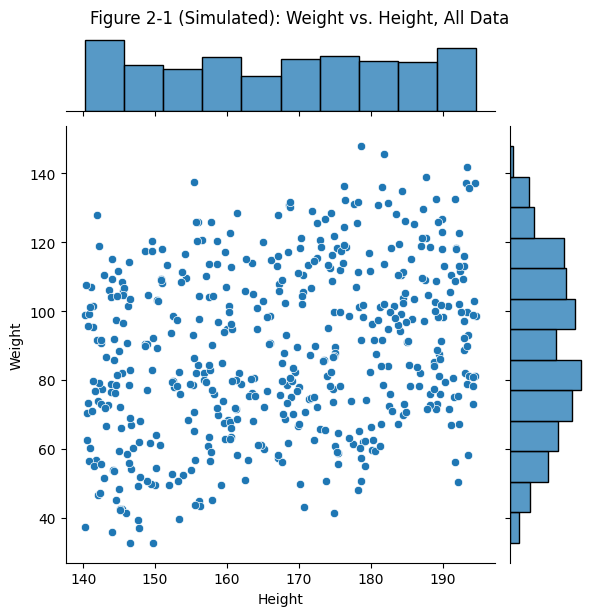

In [2]:
# Python Cell: Plotting Dataset 1 (Initially No Pattern)
print("--- Analysis of First Dataset ---")
print("Plotting all data points from the first dataset (similar to Figure 2-1).")
print("No clear pattern is visible.")

sns.jointplot(data=df1, x='Height', y='Weight', kind='scatter')
plt.suptitle("Figure 2-1 (Simulated): Weight vs. Height, All Data", y=1.02)
plt.show()


--- Analysis of Second Dataset ---
Plotting the second dataset shows a clear linear dependency (similar to Figure 2-2).


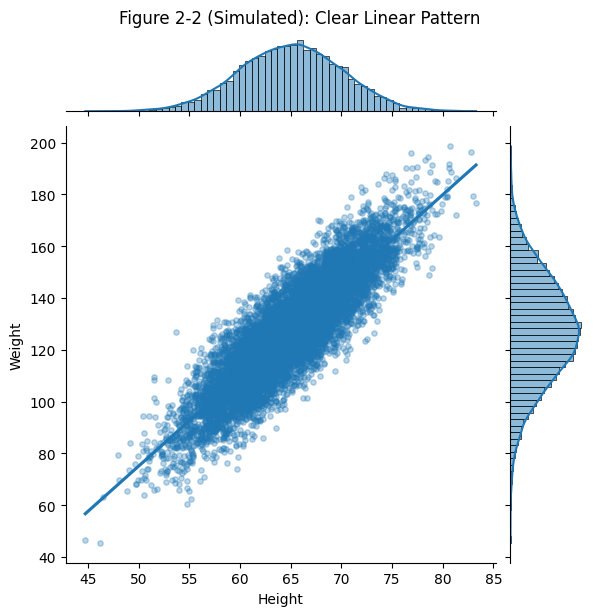

In [3]:
# Python Cell: Plotting Dataset 2 (Clear Pattern)
print("\n--- Analysis of Second Dataset ---")
print("Plotting the second dataset shows a clear linear dependency (similar to Figure 2-2).")

# A jointplot with kind='reg' will show the scatter plot plus a linear regression line
sns.jointplot(data=df2, x='Height', y='Weight', kind='reg',
              joint_kws={'scatter_kws': {'alpha': 0.3, 's': 15}})
plt.suptitle("Figure 2-2 (Simulated): Clear Linear Pattern", y=1.02)
plt.show()


After investigation, we plot the data for a single 'Index' score (e.g., Index = 3).
A linear pattern now emerges (similar to Figure 2-3).


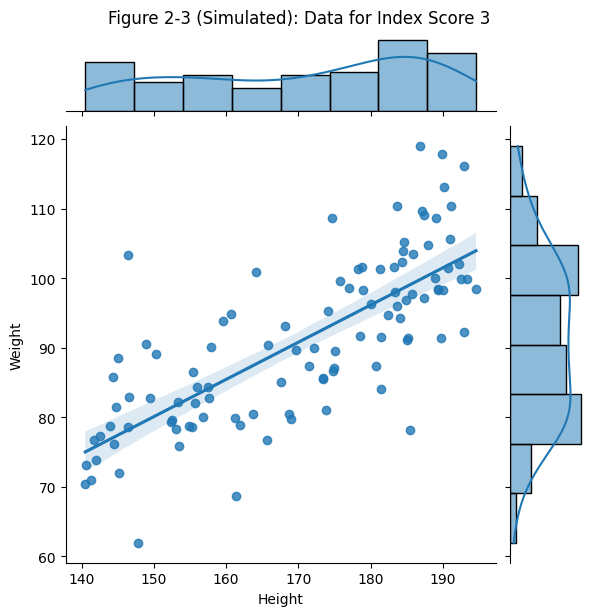

In [4]:
# Python Cell: Resolving the Mystery in Dataset 1
print("\nAfter investigation, we plot the data for a single 'Index' score (e.g., Index = 3).")
print("A linear pattern now emerges (similar to Figure 2-3).")

# Filter data for a specific index score
df1_filtered = df1[df1['Index'] == 3]

sns.jointplot(data=df1_filtered, x='Height', y='Weight', kind='reg') # 'reg' adds a regression line
plt.suptitle("Figure 2-3 (Simulated): Data for Index Score 3", y=1.02)
plt.show()

**An Example of Simulated Data**

This section walks through the process of creating data via simulation. By first assuming a linear model (weight = ω₀ + ω₁ × height), one can generate data points by choosing numerical values for the parameters ω₀ and ω₁. The text uses ω₀ = -314.5 and ω₁ = 7.07. An initial simulation with this exact formula produces data that lies on a perfect straight line, which is unrealistic. To create a more realistic dataset, the process is refined by introducing randomness: height values are sampled from a normal (bell-shaped) distribution, and random "noise" (also sampled from a normal distribution) is added to the final weight calculation. The resulting scatter plot closely resembles the plot of real data, demonstrating the power of simulation.

**Key Points**

* Simulation begins with a hypothesized mathematical model.
* A deterministic model (with no randomness) will produce perfectly clean data.
* To make simulated data more realistic, randomness is introduced by sampling values from probability distributions (for features) and adding noise (for outcomes).
* Simulated data can be generated very quickly compared to the time and effort required for real data collection.

* Assumed linear model: weight = wo + w1 × height
* Model with chosen parameter values: weight = -314.5 + 7.07 × height
* Realistic model incorporating random noise: weight = -314.5 + 7.07 × height + noise

Python Example: Simulating Data.
The code below reproduces the two simulations described in the text.

In [5]:
# Text Cell
# --- Simulation 1: Perfect Linear Data (Similar to Figure 2-4) ---
# We use the exact formula from the text without any randomness or noise.

# Define the parameters
w0 = -314.5
w1 = 7.07

# Generate a range of height values
height_sim1 = np.linspace(54, 79, 5000)
# Calculate weight using the deterministic linear formula
weight_sim1 = w0 + w1 * height_sim1

df_sim1 = pd.DataFrame({'Height': height_sim1, 'Weight': weight_sim1})

--- Simulation 1: Deterministic Model ---
The generated data points fall on a perfect straight line (similar to Figure 2-4).


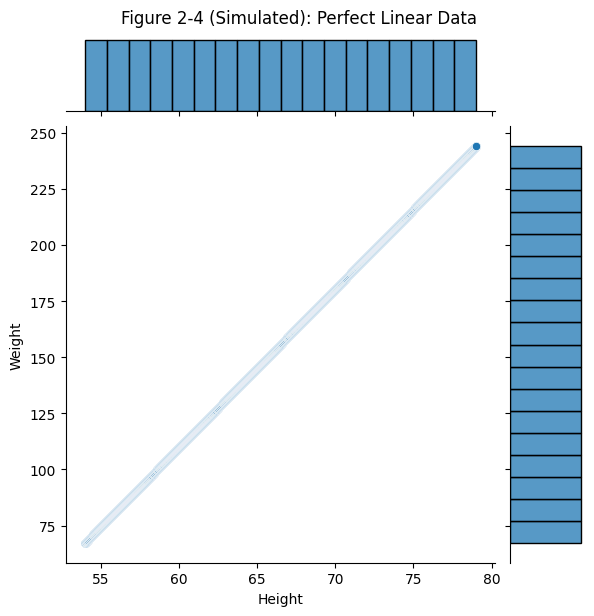

In [6]:
# Python Cell: Plotting the Perfect Linear Data
print("--- Simulation 1: Deterministic Model ---")
print("The generated data points fall on a perfect straight line (similar to Figure 2-4).")

sns.jointplot(data=df_sim1, x='Height', y='Weight', kind='scatter')
plt.suptitle("Figure 2-4 (Simulated): Perfect Linear Data", y=1.02)
plt.show()

In [7]:
# Text Cell
# --- Simulation 2: Realistic Data with Noise (Similar to Figure 2-5) ---
# We now add realism by sampling heights from a normal distribution and adding random noise.

np.random.seed(123)
n_samples_sim2 = 5000
# Sample heights from a normal distribution (mean=65 inches, std_dev=3)
height_sim2 = np.random.normal(65, 3, n_samples_sim2)

# Sample noise from a normal distribution (mean=0, std_dev=5)
noise = np.random.normal(0, 5, n_samples_sim2)

# Calculate weight using the formula plus noise
weight_sim2 = w0 + w1 * height_sim2 + noise

df_sim2 = pd.DataFrame({'Height': height_sim2, 'Weight': weight_sim2})


--- Simulation 2: Model with Randomness ---
This data includes noise and looks much more like real-world data (similar to Figure 2-5).


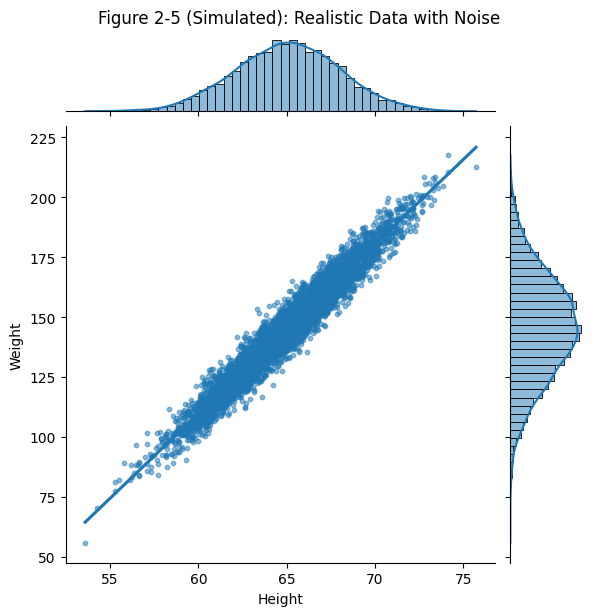

In [8]:
# Python Cell: Plotting the Realistic Simulated Data
print("\n--- Simulation 2: Model with Randomness ---")
print("This data includes noise and looks much more like real-world data (similar to Figure 2-5).")

sns.jointplot(data=df_sim2, x='Height', y='Weight', kind='reg',
              joint_kws={'scatter_kws': {'alpha': 0.5, 's': 10}})
plt.suptitle("Figure 2-5 (Simulated): Realistic Data with Noise", y=1.02)
plt.show()

**Mathematical Models, Simulations, and AI**

This section describes the synergistic relationship between mathematical models, computer simulations, and AI. This interaction unfolds in three primary ways. First, simulations serve as a crucial source of training data for AI systems, particularly for scenarios that are hazardous, expensive, or rare, such as training a self-driving car to handle accidents. Second, AI can be used to improve and enhance existing mathematical models and simulations by helping to determine model parameters, define probability distributions, and scale complex computations. Third, AI itself can be viewed as a sophisticated mathematical model and simulation, as it aims to computationally replicate tasks and behaviors associated with human intelligence, like vision and language.

**Key Points**

* Simulations for AI: Simulations generate data to train AI models, a practice essential for creating robust systems in domains like autonomous driving and drug discovery.
* AI for Simulations: AI can refine and improve traditional mathematical models by helping to find optimal parameters or manage computational complexity.
* AI as Simulation: At its core, an AI system is a computational and mathematical model designed to simulate intelligent processes.
---


**Where Do We Get Our Data From?**

This section discusses the practicalities and challenges of acquiring data for AI projects. The author relates a personal experience highlighting that obtaining real-world data can be difficult due to privacy regulations, institutional policies, and a general reluctance from organizations to share their data. The text suggests several viable data sources: public repositories (like Kaggle), web crawling (while adhering to website terms of service), and studying the data used to train famous AI models. For instance, AlexNet was trained on the massive ImageNet dataset, and WaveNet used large corpora of audio files. The section stresses the immense value of labeled data, which provides the "ground truth" needed to measure a model's performance.

**Key Points**

* Obtaining real-world data is often a significant hurdle in AI projects.

* Good sources for data include public repositories, web crawling, and analyzing the datasets behind major AI breakthroughs.

* Famous AI models like AlexNet and WaveNet were trained on huge, often unstructured, datasets (e.g., ImageNet).

* Labeled data is critical because it provides the ground truth for training and evaluation.

Python Example: Conceptual Web Crawling

This code provides a simple, conceptual illustration of web crawling using requests to fetch web page content and BeautifulSoup to parse it.

Note: Always check a website's robots.txt file and terms of service before crawling it.

In [9]:
# Text Cell
# This is a conceptual example of web crawling.
# It requires installing the 'requests' and 'beautifulsoup4' libraries:
# pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup

# The URL to crawl (using a placeholder to avoid making a real request here)
# In a real scenario, you would use a valid URL.
url = 'http://www.gwu.edu' # A safe, example domain

print(f"Concept: Fetching HTML content from a URL like: {url}")

# --- In a real script, you would uncomment the following lines ---
# try:
#     # 1. Send an HTTP GET request to the URL
#     response = requests.get(url)
#     response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
#
#     # 2. Parse the HTML content of the page with BeautifulSoup
#     soup = BeautifulSoup(response.text, 'html.parser')
#
#     # 3. Extract specific information, for example, the page title and all headings
#     page_title = soup.title.string
#     print(f"Page Title: {page_title}")
#
#     print("\nFound Headings:")
#     headings = soup.find_all(['h1', 'h2', 'h3'])
#     for heading in headings:
#         print(f"- {heading.name}: {heading.get_text(strip=True)}")
#
# except requests.exceptions.RequestException as e:
#     print(f"An error occurred: {e}")

Concept: Fetching HTML content from a URL like: http://www.gwu.edu


**The Vocabulary of Data, Probability, and Statistics**

This section serves as a primer on the essential vocabulary from probability and statistics that is fundamental to understanding AI. It begins by contrasting deterministic functions with random variables, whose outcomes are uncertain. It then introduces a series of key concepts in a logical order: probability distributions (which describe the likelihood of outcomes), marginal probabilities, the widely used uniform and normal distributions, and conditional probabilities, which are handled by Bayes' Rule. The text also defines related Bayesian terms like prior distribution, posterior distribution, and the likelihood function. Other important concepts mentioned include expectation (mean/average) and variance (spread/uncertainty), covariance (measuring linear relationships), Markov processes, and the practical data preprocessing step of normalization.

**Key Points**

* A random variable is a variable whose value is a numerical outcome of a random phenomenon; its outcome is uncertain.
* A probability distribution assigns a probability to each possible outcome of a random variable.
* Bayes' Rule is a mathematical formula for determining conditional probability, which is crucial when the full joint probability distribution is unknown.
* Expectation (or mean) is the long-run average value of a random variable, while variance measures how spread out the possible values are from the mean.
* Covariance and correlation are measures of how much two random variables change together.
* Normalizing (or standardizing) data is a common preprocessing step that involves shifting the data to have a mean of zero and scaling it to have a standard deviation of one.

**Sum Rule for Marginal Probability:**

The probability of an event $x$ can be found by summing the joint probabilities over all possible states of another variable $y$.

$$ p(x) = \sum_y p(x,y) $$

(Note: The formula in the source text contains typos. The version presented here is the standard, correct formula that was intended.)

Python Example: Normalizing Data
This code demonstrates how to standardize a dataset using scikit-learn's StandardScaler.

In [10]:
# Text Cell
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a sample dataset with different scales
# Feature 1: age (e.g., 20-70)
# Feature 2: income (e.g., 40000-150000)
data = np.array([
    [25, 50000],
    [45, 120000],
    [65, 80000],
    [30, 45000],
    [50, 150000]
])

print("Original Data:\n", data)
print(f"\nOriginal Mean (per feature): {data.mean(axis=0)}")
print(f"Original Std Dev (per feature): {data.std(axis=0)}")

Original Data:
 [[    25  50000]
 [    45 120000]
 [    65  80000]
 [    30  45000]
 [    50 150000]]

Original Mean (per feature): [4.3e+01 8.9e+04]
Original Std Dev (per feature): [1.43527001e+01 4.05462699e+04]


In [11]:
# Python Cell
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
standardized_data = scaler.fit_transform(data)

print("\nStandardized (Normalized) Data:\n", standardized_data)
# The mean of standardized data will be very close to 0
print(f"\nStandardized Mean (per feature): {standardized_data.mean(axis=0)}")
# The standard deviation of standardized data will be 1
print(f"Standardized Std Dev (per feature): {standardized_data.std(axis=0)}")


Standardized (Normalized) Data:
 [[-1.25411943 -0.96186407]
 [ 0.1393466   0.76455862]
 [ 1.53281263 -0.22196863]
 [-0.90575292 -1.08517997]
 [ 0.48771311  1.50445405]]

Standardized Mean (per feature): [-1.11022302e-17 -4.44089210e-17]
Standardized Std Dev (per feature): [1. 1.]


**Continuous vs. Discrete Distributions & Joint Probability**

This section elaborates on the crucial distinction between continuous and discrete probability distributions. For continuous variables (e.g., height, temperature), which can take any value within a range, the probability of observing one exact value is technically zero. Instead, probabilities are calculated for intervals by integrating a probability density function (PDF). For discrete variables (e.g., number of heads in a coin flip, roll of a die), which can only take on specific, separate values, the probability of each exact value can be determined using a probability mass function (PMF). The text then explains that the joint probability distribution of multiple variables is incredibly powerful because it encodes all possible information about their relationships, including marginal and conditional probabilities. However, storing and computing these joint distributions becomes prohibitively expensive as the number of dependent variables increases, a problem known as the curse of dimensionality.

**Key Points**

* Continuous Distributions: Use a PDF. Probability is the area under the curve over an interval, found via integration.
* Discrete Distributions: Use a PMF, which gives the probability of each distinct outcome.
* Joint Probability Distribution: A function that gives the probability of multiple random variables all occurring simultaneously. It is powerful but suffers from the curse of dimensionality.

**Formulas**

Probability for a Single Continuous Variable (height between 5.95 and 6.05):
$$ P(5.95 < \text{height} < 6.05) = \int_{5.95}^{6.05} f(x_1) dx_1 $$

Joint Probability for Two Continuous Variables (height and weight):
$$ P(5.95 < \text{height} < 6.05, 160 < \text{weight} < 175) = \int_{160}^{175} \int_{5.95}^{6.05} f(x_1, x_2) dx_1 dx_2 $$

Joint Probability for Three Continuous Variables:
$$ P(a < x_1 < b, c < x_2 < d, e < x_3 < f) = \int_e^f \int_c^d \int_a^b f(x_1, x_2, x_3) dx_1 dx_2 dx_3 $$

---

**The Uniform and Normal (Gaussian) Distributions**

This section details two of the most common continuous probability distributions. The Uniform Distribution is used to model phenomena where every outcome within a specific range is equally likely. Its probability density function (PDF) is a constant value over that interval and zero elsewhere. The Normal (or Gaussian) Distribution is better suited for modeling data that clusters around a central average, such as human height or blood pressure. Its famous bell shape is defined by two parameters: the mean (μ), which sets the center of the peak, and the standard deviation (σ), which controls the spread or width of the bell. The text notes that the prevalence of the normal distribution in nature is explained by the Central Limit Theorem, which states that the average of many independent random variables will itself tend to be normally distributed.

**Key Points**

* Uniform Distribution: Characterized by a constant probability for all values within a given interval, $(x_{\text{min}}, x_{\text{max}})$.

* Normal Distribution: A bell-shaped curve defined by its mean μ (center) and standard deviation σ (spread).

* The Central Limit Theorem provides a mathematical justification for why the normal distribution appears so frequently in nature and statistics.


**Formulas**

Uniform PDF:
$$ f(x; x_{\text{min}}, x_{\text{max}}) = \frac{1}{x_{\text{max}} - x_{\text{min}}} \quad \text{for } x \in (x_{\text{min}}, x_{\text{max}}) $$

Univariate Normal PDF:
$$ g(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ - \frac{(x - \mu)^2}{2\sigma^2} } $$
(Note: The source text has a typo ($\sigma-\mu$) which has been corrected to $(x-\mu)$ as is standard.)

Multivariate Normal PDF (Compact Form) for a k-dimensional vector u:
$$ g(u; \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^k \det(\Sigma)}} e^{ - \frac{1}{2} (u - \mu)^T \Sigma^{-1} (u - \mu) } $$

Python Example: Visualizing Uniform and Normal PDFs

In [12]:
# Text Cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

# --- Uniform Distribution ---
# Define the interval [0, 1]
xmin, xmax = 0, 1
loc, scale = xmin, xmax - xmin # Parameters for scipy

# Generate x values for plotting
x_uni = np.linspace(-0.5, 1.5, 400)
# Get the PDF values
pdf_uni = uniform.pdf(x_uni, loc=loc, scale=scale)

--- Uniform Distribution PDF (similar to Figure 2-8) ---


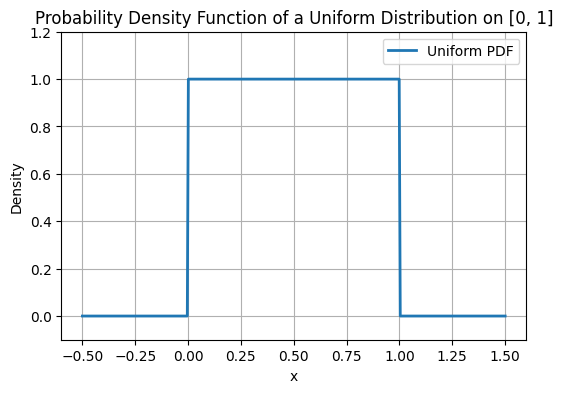

In [13]:
# Python Cell: Plot Uniform PDF
print("--- Uniform Distribution PDF (similar to Figure 2-8) ---")
plt.figure(figsize=(6, 4))
plt.plot(x_uni, pdf_uni, lw=2, label='Uniform PDF')
plt.title('Probability Density Function of a Uniform Distribution on [0, 1]')
plt.xlabel('x')
plt.ylabel('Density')
plt.ylim(-0.1, 1.2)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# Text Cell
# --- Normal Distribution ---
# Define parameters: mean (mu) = 0, standard deviation (sigma) = 1
mu, sigma = 0, 1

# Generate x values for plotting
x_norm = np.linspace(-4, 4, 400)
# Get the PDF values
pdf_norm = norm.pdf(x_norm, loc=mu, scale=sigma)


--- Normal Distribution PDF (similar to Figure 2-9) ---


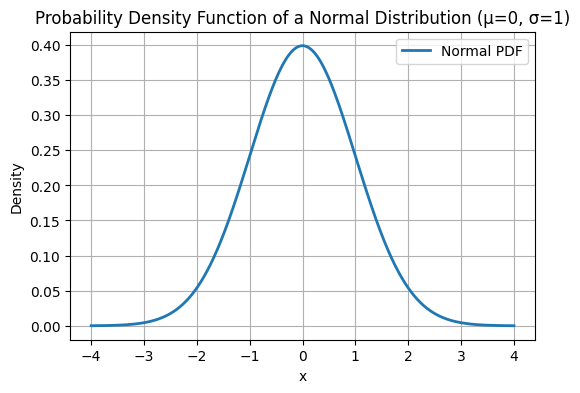

In [15]:
# Python Cell: Plot Normal PDF
print("\n--- Normal Distribution PDF (similar to Figure 2-9) ---")
plt.figure(figsize=(6, 4))
plt.plot(x_norm, pdf_norm, lw=2, label='Normal PDF')
plt.title('Probability Density Function of a Normal Distribution (μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

**Other Important and Commonly Used Distributions**

This section serves as a quick reference guide to several other important probability distributions that are frequently used in AI and data science. It briefly describes the use case and controlling parameters for each. The distributions covered include:

* Discrete Distributions:

 * Binomial: Models the number of successes in a fixed number of independent trials.

 * Poisson: Models the number of rare, independent events occurring in a fixed interval of time or space.
 * Geometric: Models the number of trials needed to get the first success.

* Continuous Distributions:
 * Exponential: Models the waiting time until a single event occurs, given a constant rate.
Weibull: A generalization of the exponential distribution used for product lifetime prediction, where failure rates can change over time.

 * Log-normal: Used for data that becomes normally distributed after taking the logarithm; often models processes that are the product of many small factors.

 * Chi-squared: Describes the distribution of a sum of squared independent normal variables, crucial for statistical goodness-of-fit tests.

 * Pareto: A heavy-tailed distribution often used to model wealth, income, or file sizes (the "80-20 rule").

**Key Points**

The following is a catalog of distributions and their applications.

* Binomial: Number of ad clicks that result in a purchase out of 1000 clicks.
* Poisson: Number of calls arriving at a call center in an hour.
* Exponential: Time until a machine part fails.
* Weibull: Lifetime of a complex product like a car.
* Chi-squared: Used in tests to see how well an observed sample fits an expected distribution.

Python Example: Binomial and Poisson Distributions

In [16]:
# Text Cell
from scipy.stats import binom, poisson
import numpy as np
import matplotlib.pyplot as plt

# --- Binomial Distribution Example ---
# Scenario: A salesperson has a 20% chance of making a sale on any given call.
# If they make 30 calls, what is the probability of making exactly 5 sales?
n_trials = 30
p_success = 0.2
k_successes = np.arange(0, n_trials + 1)

# Calculate the Probability Mass Function (PMF)
pmf_binom = binom.pmf(k_successes, n_trials, p_success)

# --- Poisson Distribution Example ---
# Scenario: A call center receives an average of 10 calls per hour.
# What is the probability of receiving exactly 12 calls in the next hour?
lambda_rate = 10
n_events = np.arange(0, 25)

# Calculate the Probability Mass Function (PMF)
pmf_poisson = poisson.pmf(n_events, lambda_rate)

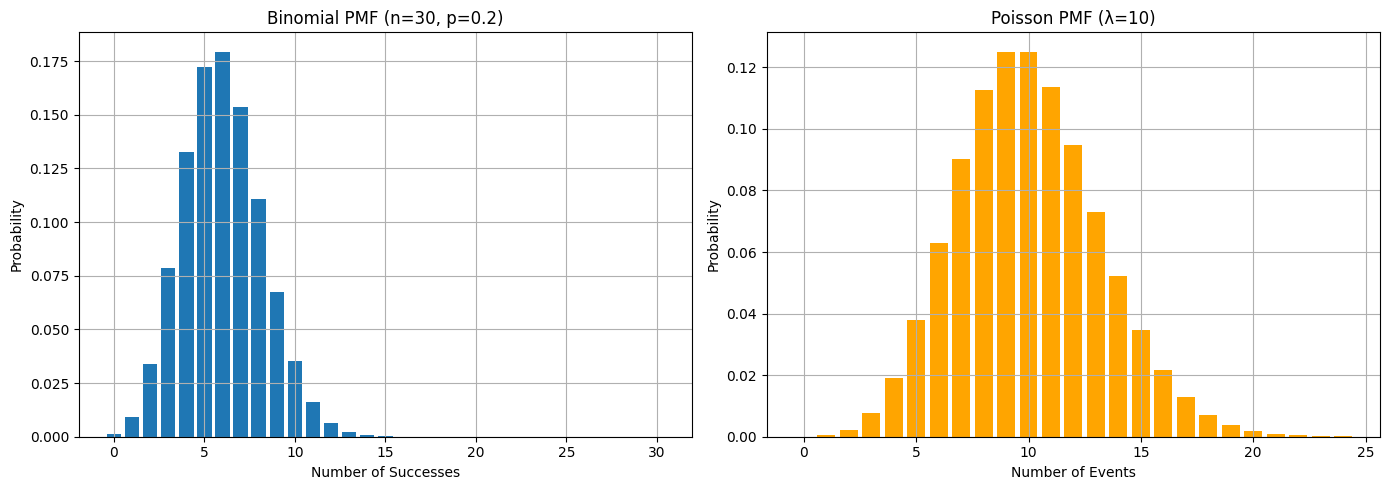

Binomial probability of exactly 5 sales: 0.1723
Poisson probability of exactly 12 calls: 0.0948


In [ ]:
# Python Cell: Plotting the Distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Binomial Plot
ax1.bar(k_successes, pmf_binom, label=f'p={p_success}')
ax1.set_title(f'Binomial PMF (n={n_trials}, p={p_success})')
ax1.set_xlabel('Number of Successes')
ax1.set_ylabel('Probability')
ax1.grid(True)

# Poisson Plot
ax2.bar(n_events, pmf_poisson, color='orange', label=f'λ={lambda_rate}')
ax2.set_title(f'Poisson PMF (λ={lambda_rate})')
ax2.set_xlabel('Number of Events')
ax2.set_ylabel('Probability')
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Binomial probability of exactly 5 sales: {binom.pmf(5, n_trials, p_success):.4f}")
print(f"Poisson probability of exactly 12 calls: {poisson.pmf(12, lambda_rate):.4f}")

**Examples of Exponential and Weibull Distributions**

These are both continuous probability distributions often used in reliability and survival analysis.

*   **Exponential Distribution:**
    *   **Use Case:** Models the waiting time until a single event occurs, given a constant average rate of occurrence. It is memoryless, meaning the probability of an event occurring in the future is independent of how much time has already passed.
    *   **Parameter:** Controlled by a single rate parameter, $\lambda$ (lambda). A larger $\lambda$ means events occur more frequently, leading to shorter average waiting times.
    *   **Example:** The time between consecutive arrivals at a queue (e.g., customers arriving at a service desk), or the time until a device fails when the failure rate is constant over time.

*   **Weibull Distribution:**
    *   **Use Case:** A more flexible distribution than the Exponential distribution, often used for product lifetime prediction. It can model failure rates that are decreasing, constant, or increasing over time.
    *   **Parameters:** Controlled by a shape parameter ($k$ or $\beta$) and a scale parameter ($\lambda$ or $\eta$).
        *   If $k=1$, the Weibull distribution reduces to the Exponential distribution (constant failure rate).
        *   If $k<1$, the failure rate decreases over time (infant mortality).
        *   If $k>1$, the failure rate increases over time (wear-out failures).
    *   **Example:** The time until a mechanical component fails due to wear and tear, or the survival time of patients after a medical treatment.

These distributions are useful when analyzing the duration of events or the lifespan of items.

--- Exponential and Weibull Distribution PDFs ---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:2757: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


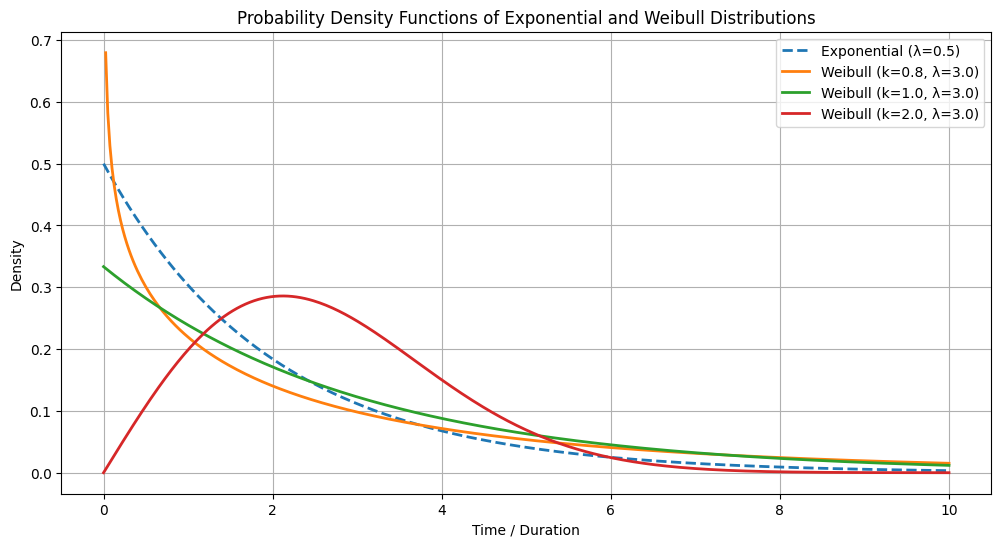

In [17]:
# Python Cell: Plotting Exponential and Weibull PDFs

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, weibull_min

print("--- Exponential and Weibull Distribution PDFs ---")

# --- Exponential Distribution Example ---
# Parameter: rate (lambda). Scale is 1/lambda.
lambda_rate = 0.5
scale_exp = 1 / lambda_rate

# Generate x values for plotting (time)
x_exp = np.linspace(0, 10, 400)
# Get the PDF values
pdf_exp = expon.pdf(x_exp, scale=scale_exp)

# --- Weibull Distribution Example ---
# Parameters: shape (k or c in scipy), scale (lambda or beta in scipy)
shape_weibull_decreasing = 0.8 # k < 1
shape_weibull_constant = 1.0   # k = 1 (same as exponential)
shape_weibull_increasing = 2.0 # k > 1
scale_weibull = 3.0 # Adjust scale as needed

# Generate x values for plotting (time)
x_weibull = np.linspace(0, 10, 400)
# Get the PDF values for different shape parameters
pdf_weibull_decreasing = weibull_min.pdf(x_weibull, shape_weibull_decreasing, scale=scale_weibull)
pdf_weibull_constant = weibull_min.pdf(x_weibull, shape_weibull_constant, scale=scale_weibull)
pdf_weibull_increasing = weibull_min.pdf(x_weibull, shape_weibull_increasing, scale=scale_weibull)


# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot Exponential PDF
plt.plot(x_exp, pdf_exp, lw=2, label=f'Exponential (λ={lambda_rate})', linestyle='--')

# Plot Weibull PDFs
plt.plot(x_weibull, pdf_weibull_decreasing, lw=2, label=f'Weibull (k={shape_weibull_decreasing}, λ={scale_weibull})')
plt.plot(x_weibull, pdf_weibull_constant, lw=2, label=f'Weibull (k={shape_weibull_constant}, λ={scale_weibull})')
plt.plot(x_weibull, pdf_weibull_increasing, lw=2, label=f'Weibull (k={shape_weibull_increasing}, λ={scale_weibull})')


plt.title('Probability Density Functions of Exponential and Weibull Distributions')
plt.xlabel('Time / Duration')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

**The Various Uses of the Word "Distribution" & A/B Testing**

This section aims to clarify potential sources of confusion in data science terminology. First, it points out that the word "distribution" is used in multiple related but distinct ways: it can refer to the empirical distribution of an observed dataset (i.e., its histogram) ; the theoretical probability mass/density function that models the data ; or the joint probability distribution of several variables.

The chapter then briefly introduces A/B testing (also known as split testing). This is a common experimental method where a population is randomly split into two or more groups to test different versions of a product or feature. For example, a company might show a new website design (Version B) to one group and the old design (Version A, the control) to another, then compare metrics like click-through rates to determine which version is more effective.

**Key Points**

* The term "distribution" can refer to:
 1. The observed frequencies in a real dataset (an empirical distribution).
 2. The theoretical mathematical function (PMF or PDF) used to model the data.
 3. A joint distribution describing multiple variables together.

* A/B testing is a controlled experiment used to compare two versions of something (e.g., a webpage, an ad) to see which performs better. It is a cornerstone of data-driven decision-making in many industries

**Summary and Looking Ahead**

This final section recaps the chapter's core messages. It reiterates that data is the central element of modern AI. It highlights the key distinctions clarified throughout the chapter, such as real vs. simulated data, structured vs. unstructured data, and linear vs. nonlinear models. The chapter also provided a conceptual "map" to the essential vocabulary and ideas from probability and statistics that are necessary for understanding AI applications. Looking forward, the text states that the next chapter will transition from describing data to using it, explaining how to fit a function to data by finding the optimal "weights" (the ω's) for its parameters in order to make predictions.

**Key Points**

* The chapter served to emphasize the critical role of data in AI and to clarify fundamental concepts and terminology.
* A conceptual map of the necessary probability and statistics for AI was provided.
* The next chapter will focus on the process of learning from data, which involves fitting a function by determining the values of its weights